# Single File (Decay) Analysis and plotting

In [95]:
import pandas as pd
import numpy as np
import glob as gb
import os
import matplotlib.pyplot as plt
import lifetime.decay as lf

from tqdm import tqdm
from scipy.optimize import curve_fit

%matplotlib notebook

In [96]:
folder = "T2_reflectance_standard"

# Get raw data files list
directory = "../Data/" + str(folder)
files = gb.glob(directory + "/raw/*.h5")

In [97]:
file = files[19400]

# Load HDF file
store = pd.HDFStore(file)
df_file = store['log']

# Create time axis in ms
fs = store['log']['fs'][0]
samples = store['log']['sample_no'][0]
x = np.arange(samples) * fs * 1E3

# Load decay data
y = np.array(store['data'])

# Close hdf5 file
store.close()

In [98]:
# Drop data points at start (weird massive drop for T2)
x, y = lf.prepare_data(x, y, reject_start=0, reject_end=0)

In [99]:
popt = lf.fit_decay(x, y)
popt

array([  0.7971414 ,  12.09873728,   0.01837123])

<IPython.core.display.Javascript object>


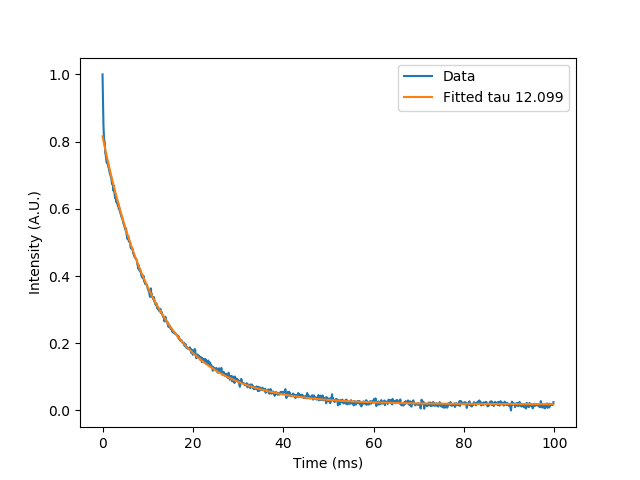

In [100]:
plt.figure()
plt.plot(x, y, label='Data')
plt.plot(x, lf.decay_fn(x, *popt), label='Fitted tau {0:.3f}'.format(popt[1]))
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')

In [101]:
plt.savefig(directory + "/raw", dpi=500)